In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
cd Final Project Deliverables

/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables


In [18]:
pwd

'/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables'

In [19]:
import pandas as pd

file_path = "/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables/Project_Prompt_to_Promt_Style_Transfer_Dataset_evlauate_dataset.tsv"
df = pd.read_csv(file_path, sep="\t")  # TSV uses tab separator
df.head()

,SNO,Topic_Content_Task,Style,Additional_Keywords,Style_Prompt,Final_Prompt,Output_Model_1_ChatGPT_51,Output_Model_2_Perplexity_Pro,Output_Model_3_Grok
0,1,Explain gravity,Scientist,", using precise terminology and logical struct...","Explain like a Scientist, using precise termin...",Task: Explain gravity Style: Explain like a Sc...,Gravity is a fundamental force that attracts o...,Gravity is a fundamental interaction that caus...,Gravity is a fundamental interaction described...
1,2,What is photosynthesis?,Scientist,", using precise terminology and logical struct...","Explain like a Scientist, using precise termin...",Task: What is photosynthesis? Style: Explain l...,Photosynthesis is a biochemical process in whi...,Photosynthesis is a biochemical process by whi...,Photosynthesis is a biochemical conversion of ...
2,3,How does the internet work?,Scientist,", using precise terminology and logical struct...","Explain like a Scientist, using precise termin...",Task: How does the internet work? Style: Expla...,The internet is a global network of interconne...,The internet is a global network of interconne...,The internet is a global packet-switched netwo...
3,4,Why do we dream?,Scientist,", using precise terminology and logical struct...","Explain like a Scientist, using precise termin...",Task: Why do we dream? Style: Explain like a S...,Dreaming occurs primarily during rapid eye mov...,Dreaming occurs during specific stages of slee...,Dreaming is a neurophysiological process occur...
4,5,Explain lightning,Scientist,", using precise terminology and logical struct...","Explain like a Scientist, using precise termin...",Task: Explain lightning Style: Explain like a ...,Lightning is a large-scale electrical discharg...,Lightning is a large-scale electrical discharg...,Lightning originates from charge separation in...


In [20]:
!pip install pandas nltk textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.1 MB/s eta 0:00:00


In [25]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import textstat

# FIX for NLTK bug
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
def lexical_diversity(text):
    words = word_tokenize(str(text).lower())
    return len(set(words)) / len(words) if len(words) > 0 else 0

def hapax_legomena_ratio(text):
    words = word_tokenize(str(text).lower())
    freq = {}
    for w in words:
        freq[w] = freq.get(w, 0) + 1
    hapax = sum(1 for w in freq if freq[w] == 1)
    return hapax / len(words) if len(words) > 0 else 0

def sentence_complexity(text):
    text = str(text)
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    if len(sentences) == 0:
        return {"avg_words_sentence": 0, "complex_word_percentage": 0}
    complex_words = [w for w in words if textstat.syllable_count(w) >= 3]
    return {
        "avg_words_sentence": len(words) / len(sentences),
        "complex_word_percentage": len(complex_words) / len(words) if len(words) else 0
    }

def evaluate_text(text):
    text = str(text)
    return {
        # Readability
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
        "gunning_fog": textstat.gunning_fog(text),
        "smog_index": textstat.smog_index(text),
        "automated_readability_index": textstat.automated_readability_index(text),

        # Lexical diversity
        "type_token_ratio": lexical_diversity(text),
        "hapax_legomena_ratio": hapax_legomena_ratio(text),

        # Sentence complexity
        **sentence_complexity(text)
    }

In [27]:
model_columns = {
    "Output_Model_1_ChatGPT_51": "chatgpt",
    "Output_Model_2_Perplexity_Pro": "perplexity",
    "Output_Model_3_Grok": "grok"
}

In [28]:
results = []

for idx, row in df.iterrows():
    row_metrics = {"SNO": row["SNO"], "Style": row["Style"]}

    for col, model_name in model_columns.items():
        metrics = evaluate_text(row[col])

        # Add prefix model_metricname
        for metric_name, value in metrics.items():
            row_metrics[f"{model_name}_{metric_name}"] = value

    results.append(row_metrics)

metrics_df = pd.DataFrame(results)

# Merge metrics back to original dataset
full_df = pd.concat([df, metrics_df.drop(columns=["SNO", "Style"])], axis=1)

# Save
full_output_path = "/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables/model_metrics_full.tsv"
full_df.to_csv(full_output_path, sep="\t", index=False)

print("Saved: model_metrics_full.tsv")

Saved: model_metrics_full.tsv


In [31]:
cd ..


/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh


In [33]:
summary_rows = []

for style in df["Style"].unique():
    style_df = metrics_df[metrics_df["Style"] == style]

    summary = {"Style": style}

    for model_name in ["chatgpt", "perplexity", "grok"]:
        model_cols = [c for c in style_df.columns if c.startswith(model_name)]
        model_summary = style_df[model_cols].mean()

        for metric_name, value in model_summary.items():
            summary[f"{model_name}_avg_{metric_name}"] = value

    summary_rows.append(summary)

summary_df = pd.DataFrame(summary_rows)

summary_path = "/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables/style_model_summary.tsv"
summary_df.to_csv(summary_path, sep="\t", index=False)

print("Saved: style_model_summary.tsv")


Saved: style_model_summary.tsv


In [34]:
!pip install pandas matplotlib numpy

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
summary_path = "/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables/style_model_summary.tsv"
summary_df = pd.read_csv(summary_path, sep="\t")

summary_df

,Style,chatgpt_avg_chatgpt_flesch_reading_ease,chatgpt_avg_chatgpt_flesch_kincaid_grade,chatgpt_avg_chatgpt_gunning_fog,chatgpt_avg_chatgpt_smog_index,chatgpt_avg_chatgpt_automated_readability_index,chatgpt_avg_chatgpt_type_token_ratio,chatgpt_avg_chatgpt_hapax_legomena_ratio,chatgpt_avg_chatgpt_avg_words_sentence,chatgpt_avg_chatgpt_complex_word_percentage,...,perplexity_avg_perplexity_complex_word_percentage,grok_avg_grok_flesch_reading_ease,grok_avg_grok_flesch_kincaid_grade,grok_avg_grok_gunning_fog,grok_avg_grok_smog_index,grok_avg_grok_automated_readability_index,grok_avg_grok_type_token_ratio,grok_avg_grok_hapax_legomena_ratio,grok_avg_grok_avg_words_sentence,grok_avg_grok_complex_word_percentage
0,Scientist,12.183162,14.437347,17.736802,14.289167,15.641256,0.743790,0.619860,13.683333,0.286670,...,0.260494,1.750282,16.557587,20.258053,16.072363,18.736364,0.742500,0.626833,17.803869,0.302219
1,Storyteller,63.005058,7.543079,8.898170,9.867192,9.458325,0.732891,0.619443,14.935000,0.099177,...,0.089877,61.389097,8.262756,10.132046,10.461481,10.584324,0.697046,0.561011,59.715000,0.097893
2,Poet,63.094627,7.099889,8.377914,9.326331,8.734517,0.739378,0.615939,12.755000,0.098381,...,0.068714,56.953232,10.963607,12.638601,11.375267,13.752764,0.718517,0.601965,28.362500,0.079562
3,Comedian,62.676368,7.364867,8.996177,9.855563,9.226062,0.780049,0.648906,16.849524,0.102048,...,0.090204,43.927392,16.536899,19.000750,13.412095,20.307509,0.622528,0.475632,55.883948,0.082710
4,Child (5-year-old),81.258500,4.254647,5.604668,7.259041,5.250477,0.736081,0.578385,12.466071,0.050208,...,0.044412,63.641238,12.090497,14.079342,9.250430,14.619002,0.675458,0.502712,37.159762,0.046820


In [41]:
metrics = [
    "flesch_reading_ease",
    "flesch_kincaid_grade",
    "gunning_fog",
    "smog_index",
    "automated_readability_index",
    "type_token_ratio",
    "hapax_legomena_ratio",
    "avg_words_sentence",
    "complex_word_percentage"
]


In [44]:
def radar_chart_for_style(df, style_name, metrics):

    style_row = df[df["Style"] == style_name].iloc[0]

    models = {
        "ChatGPT": "chatgpt_avg_chatgpt_",
        "Perplexity": "perplexity_avg_perplexity_",
        "Grok": "grok_avg_grok_"
    }

    data = []

    # Extract metric values model-wise
    for model_label, prefix in models.items():
        model_vals = []
        for m in metrics:
            col_name = prefix + m
            model_vals.append(style_row[col_name])
        data.append(model_vals)

    # Radar setup
    num_vars = len(metrics)
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

    # Plot each model
    for i, (model_label, _) in enumerate(models.items()):
        values = data[i]
        values_loop = values + [values[0]]
        angle_loop = np.concatenate((angles, [angles[0]]))

        ax.plot(angle_loop, values_loop, label=model_label, linewidth=2)
        ax.fill(angle_loop, values_loop, alpha=0.1)

    ax.set_xticks(angles)
    ax.set_xticklabels(metrics, fontsize=10)
    ax.set_title(f"Style: {style_name}", fontsize=16)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    plt.show()


In [40]:
summary_df.columns.tolist()

['Style',
 'chatgpt_avg_chatgpt_flesch_reading_ease',
 'chatgpt_avg_chatgpt_flesch_kincaid_grade',
 'chatgpt_avg_chatgpt_gunning_fog',
 'chatgpt_avg_chatgpt_smog_index',
 'chatgpt_avg_chatgpt_automated_readability_index',
 'chatgpt_avg_chatgpt_type_token_ratio',
 'chatgpt_avg_chatgpt_hapax_legomena_ratio',
 'chatgpt_avg_chatgpt_avg_words_sentence',
 'chatgpt_avg_chatgpt_complex_word_percentage',
 'perplexity_avg_perplexity_flesch_reading_ease',
 'perplexity_avg_perplexity_flesch_kincaid_grade',
 'perplexity_avg_perplexity_gunning_fog',
 'perplexity_avg_perplexity_smog_index',
 'perplexity_avg_perplexity_automated_readability_index',
 'perplexity_avg_perplexity_type_token_ratio',
 'perplexity_avg_perplexity_hapax_legomena_ratio',
 'perplexity_avg_perplexity_avg_words_sentence',
 'perplexity_avg_perplexity_complex_word_percentage',
 'grok_avg_grok_flesch_reading_ease',
 'grok_avg_grok_flesch_kincaid_grade',
 'grok_avg_grok_gunning_fog',
 'grok_avg_grok_smog_index',
 'grok_avg_grok_automa

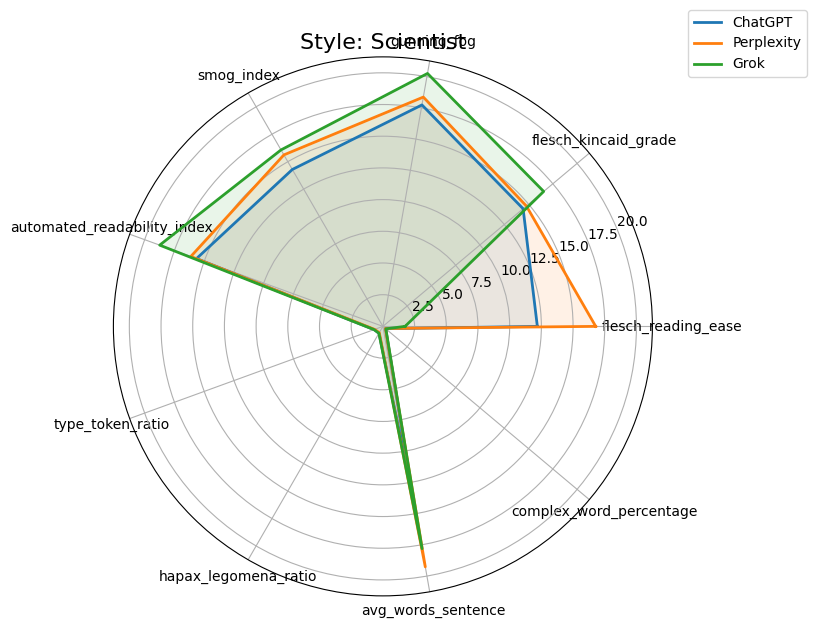

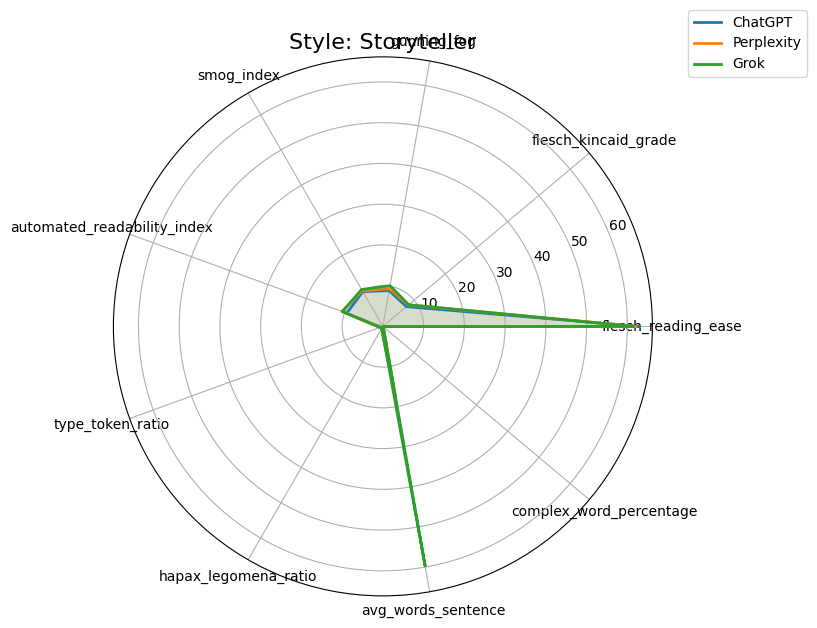

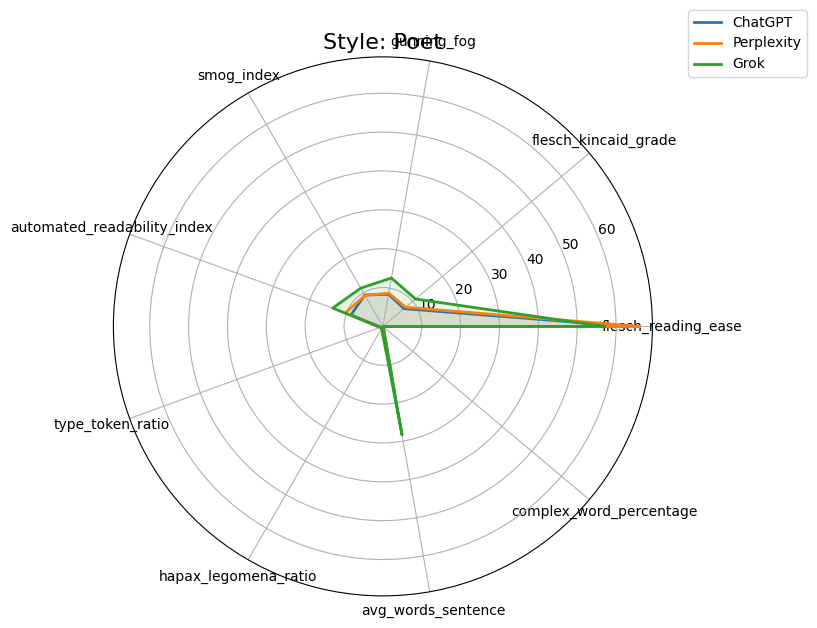

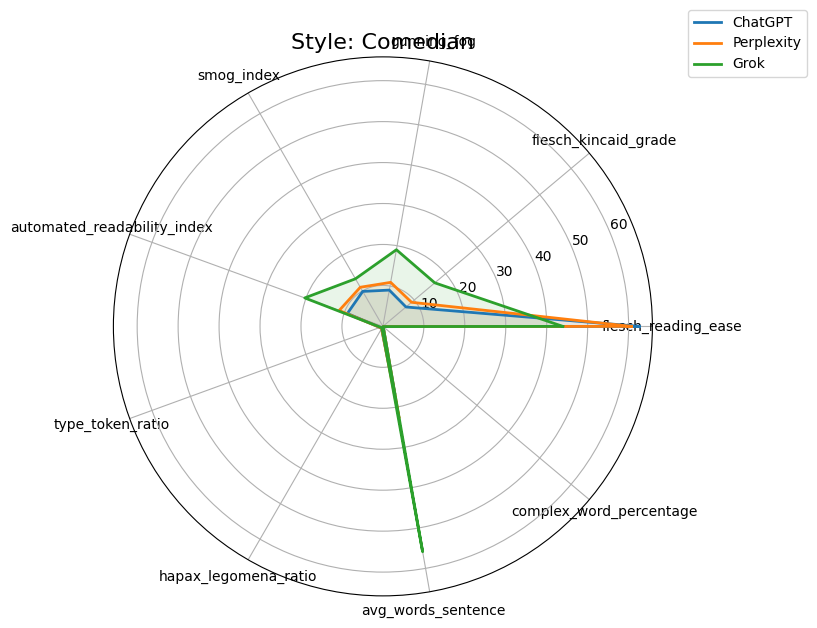

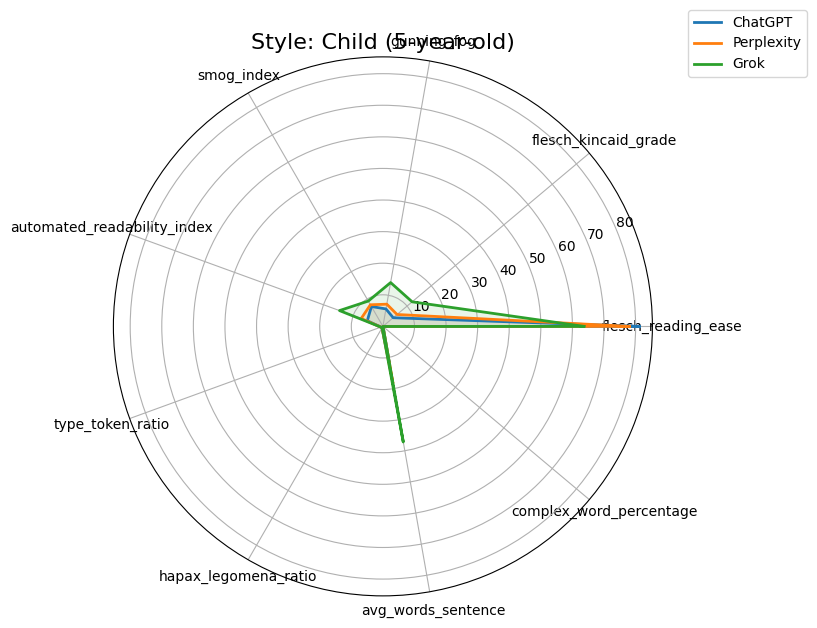

In [45]:
for style in summary_df["Style"].unique():
    radar_chart_for_style(summary_df, style, metrics)

In [46]:
import pandas as pd
import numpy as np


In [49]:
summary_path = "/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables/style_model_summary.tsv"
summary_df = pd.read_csv(summary_path, sep="\t")


In [50]:
readability_metrics = [
    "flesch_reading_ease",
    "flesch_kincaid_grade",
    "gunning_fog",
    "smog_index",
    "automated_readability_index"
]

lexical_metrics = [
    "type_token_ratio",
    "hapax_legomena_ratio"
]

complexity_metrics = [
    "avg_words_sentence",
    "complex_word_percentage"
]


In [51]:
model_prefixes = {
    "ChatGPT": "chatgpt_avg_chatgpt_",
    "Perplexity": "perplexity_avg_perplexity_",
    "Grok": "grok_avg_grok_"
}

In [52]:
summary_rows = []

for style in summary_df["Style"].unique():
    row = summary_df[summary_df["Style"] == style].iloc[0]

    for model_name, prefix in model_prefixes.items():

        r_vals = [row[prefix + m] for m in readability_metrics]
        l_vals = [row[prefix + m] for m in lexical_metrics]
        c_vals = [row[prefix + m] for m in complexity_metrics]

        summary_rows.append({
            "Style": style,
            "Model": model_name,
            "Avg_Readability": np.mean(r_vals),
            "Avg_Lexical_Richness": np.mean(l_vals),
            "Avg_Complexity": np.mean(c_vals)
        })

summary_table = pd.DataFrame(summary_rows)
summary_table


,Style,Model,Avg_Readability,Avg_Lexical_Richness,Avg_Complexity
0,Scientist,ChatGPT,14.857547,0.681825,6.985002
1,Scientist,Perplexity,16.333334,0.632575,9.760723
2,Scientist,Grok,14.674930,0.684666,9.053044
3,Storyteller,ChatGPT,19.754365,0.676167,7.517088
4,Storyteller,Perplexity,20.091911,0.701629,9.026813
5,Storyteller,Grok,20.165941,0.629029,29.906446
6,Poet,ChatGPT,19.326656,0.677658,6.426690
7,Poet,Perplexity,20.376658,0.683127,8.959357
8,Poet,Grok,21.136694,0.660241,14.221031
9,Comedian,ChatGPT,19.623807,0.714477,8.475786


In [53]:
def interpret_readability(score):
    if score > 60:
        return "very easy to read"
    elif score > 30:
        return "moderately readable"
    else:
        return "complex and difficult to read"

def interpret_lexical(score):
    if score > 0.5:
        return "high lexical diversity"
    elif score > 0.3:
        return "moderate diversity"
    else:
        return "simple vocabulary"

def interpret_complexity(score):
    if score > 20:
        return "long and complex sentences"
    elif score > 12:
        return "medium sentence complexity"
    else:
        return "short, simple sentences"


report_summaries = []

for _, row in summary_table.iterrows():
    r_phrase = interpret_readability(row["Avg_Readability"])
    l_phrase = interpret_lexical(row["Avg_Lexical_Richness"])
    c_phrase = interpret_complexity(row["Avg_Complexity"])

    paragraph = (
        f"For the **{row['Style']}** style, **{row['Model']}** produced responses that were "
        f"{r_phrase}, used {l_phrase}, and showed {c_phrase}. "
        f"This suggests that the model tends to adapt to the {row['Style']} style "
        f"with a characteristic writing pattern reflecting these linguistic traits."
    )

    report_summaries.append({
        "Style": row["Style"],
        "Model": row["Model"],
        "Summary": paragraph
    })

report_df = pd.DataFrame(report_summaries)
report_df


,Style,Model,Summary
0,Scientist,ChatGPT,"For the **Scientist** style, **ChatGPT** produ..."
1,Scientist,Perplexity,"For the **Scientist** style, **Perplexity** pr..."
2,Scientist,Grok,"For the **Scientist** style, **Grok** produced..."
3,Storyteller,ChatGPT,"For the **Storyteller** style, **ChatGPT** pro..."
4,Storyteller,Perplexity,"For the **Storyteller** style, **Perplexity** ..."
5,Storyteller,Grok,"For the **Storyteller** style, **Grok** produc..."
6,Poet,ChatGPT,"For the **Poet** style, **ChatGPT** produced r..."
7,Poet,Perplexity,"For the **Poet** style, **Perplexity** produce..."
8,Poet,Grok,"For the **Poet** style, **Grok** produced resp..."
9,Comedian,ChatGPT,"For the **Comedian** style, **ChatGPT** produc..."


In [54]:
report_df.to_csv("/content/drive/.shortcut-targets-by-id/1TfKakLLhqJ_X1AQGWWP9Z1a05BY4Z5Uh/Final Project Deliverables/style_model_report_summary.tsv",
                 sep="\t", index=False)

print("Saved: style_model_report_summary.tsv")


Saved: style_model_report_summary.tsv
